In [1]:
# import visualizing tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 99

In [2]:
# read training data
train_df = pd.read_csv('./data/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# view how many fields are present
train_df.shape

(1460, 81)

In [4]:
# features present in the data
# info on features can be found in the github repo
# remove columns with a lot of missing data
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# see which columns contain missing data as a percentage
train_df.isnull().sum().sort_values(ascending=False)/train_df.shape[0]

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
LotConfig        0.000000
OverallCond      0.000000
OverallQual      0.000000
HouseStyle       0.000000
BldgType         0.000000
Condition2       0.000000
BsmtFinSF1       0.000000
MSZoning         0.000000
LotArea     

In [6]:
# drop columns that are missing more than 10% of data
new_train_df = train_df.dropna(axis='columns', thresh=train_df.shape[0]*0.9)
(new_train_df.isnull().sum().sort_values(ascending=False)/new_train_df.shape[0])[:10]

GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageCond      0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
dtype: float64

In [7]:
# analyze sale price (predictor)
new_train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

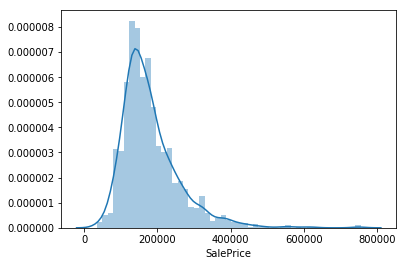

In [8]:
# visualize distribution of sale price
sns.distplot(new_train_df['SalePrice'])

In [9]:
# see which columns are numerical and categorical
new_train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


In [10]:
new_train_df.shape

(1460, 75)

In [11]:
# find all categories for nonnumerical data
from pandas.api.types import is_object_dtype
for (colName, colData) in new_train_df.iteritems():
    if is_object_dtype(colData):
        print(colName, ' categories: ', colData.astype("category").cat.categories)

MSZoning  categories:  Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object')
Street  categories:  Index(['Grvl', 'Pave'], dtype='object')
LotShape  categories:  Index(['IR1', 'IR2', 'IR3', 'Reg'], dtype='object')
LandContour  categories:  Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object')
Utilities  categories:  Index(['AllPub', 'NoSeWa'], dtype='object')
LotConfig  categories:  Index(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype='object')
LandSlope  categories:  Index(['Gtl', 'Mod', 'Sev'], dtype='object')
Neighborhood  categories:  Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')
Condition1  categories:  Index(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
       'RRNn'],
      dtype='ob

/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


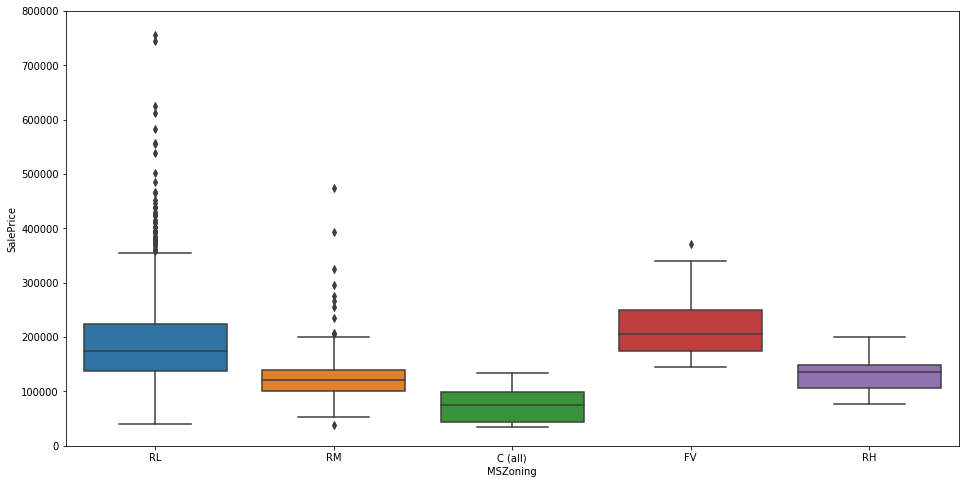

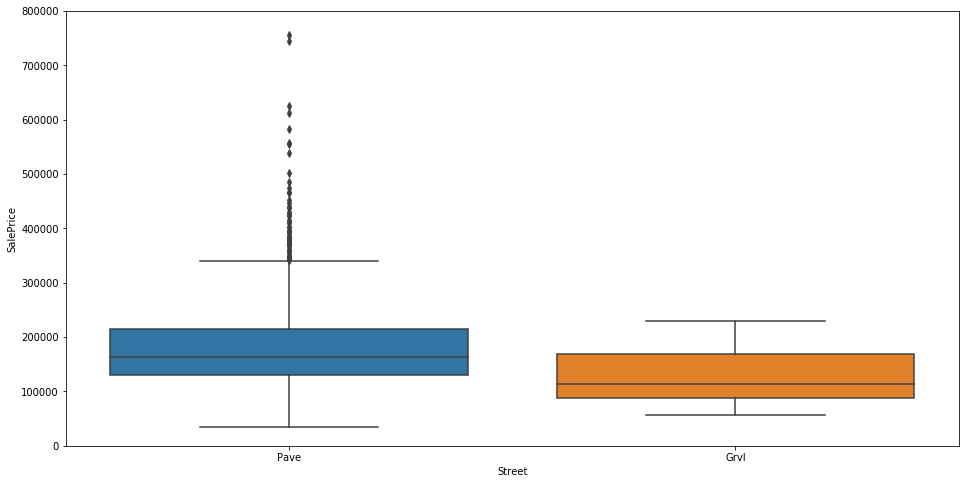

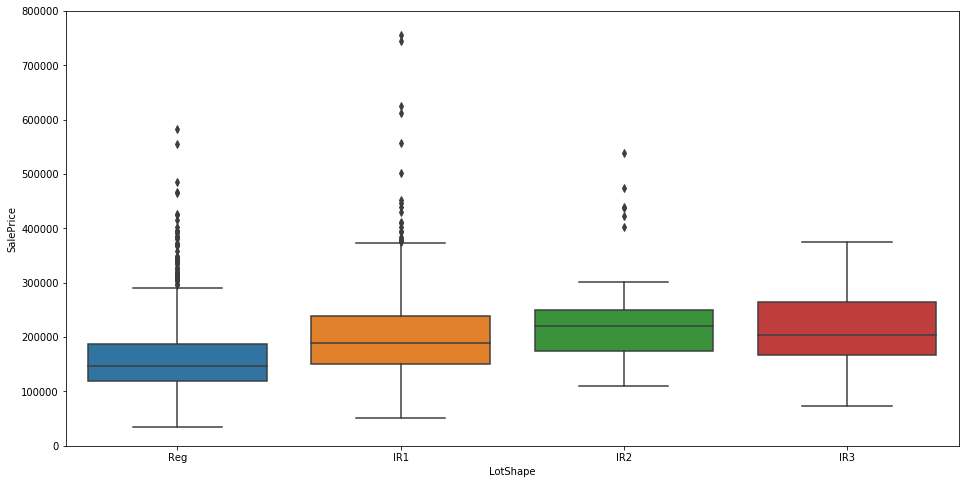

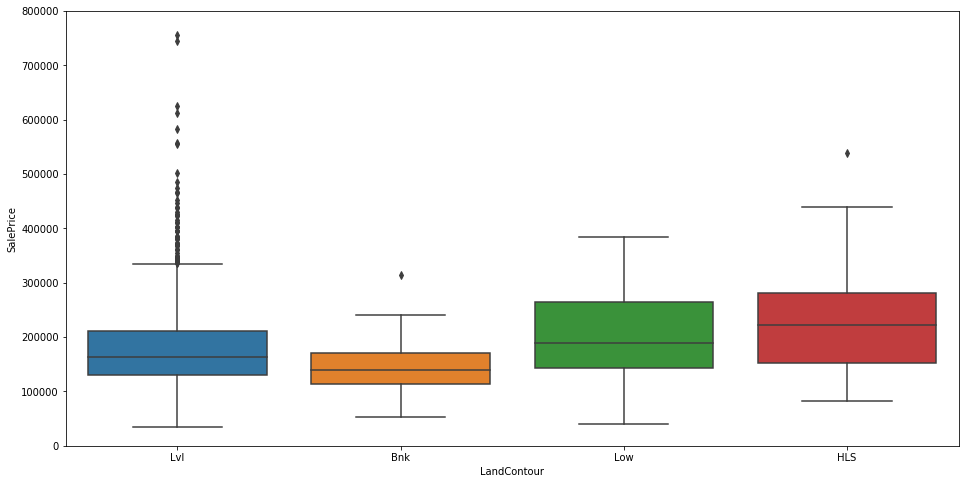

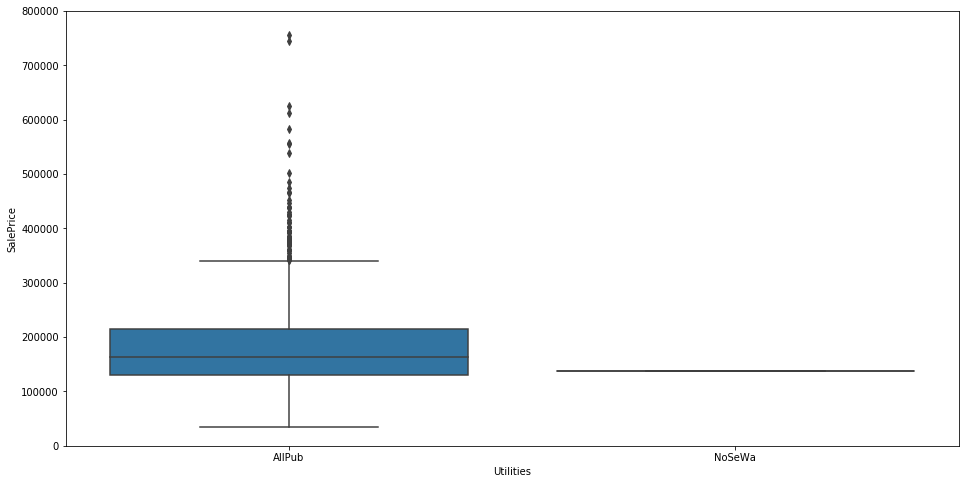

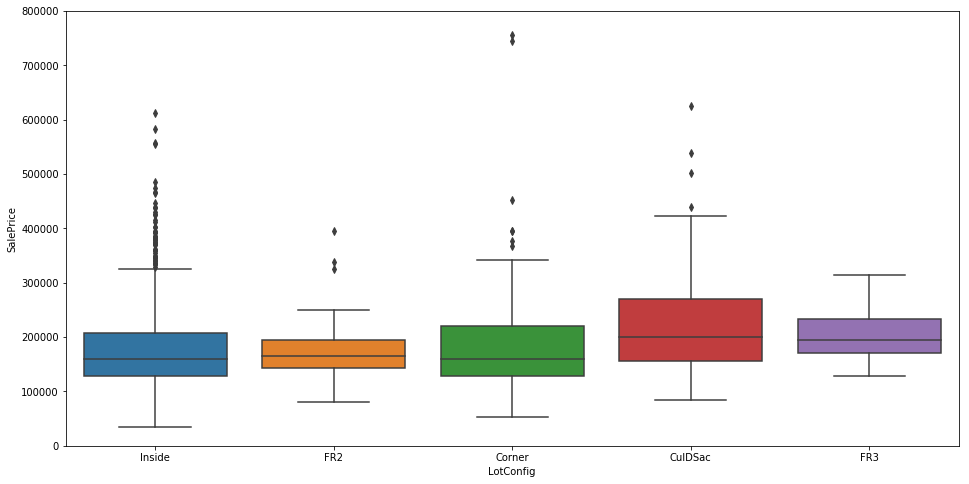

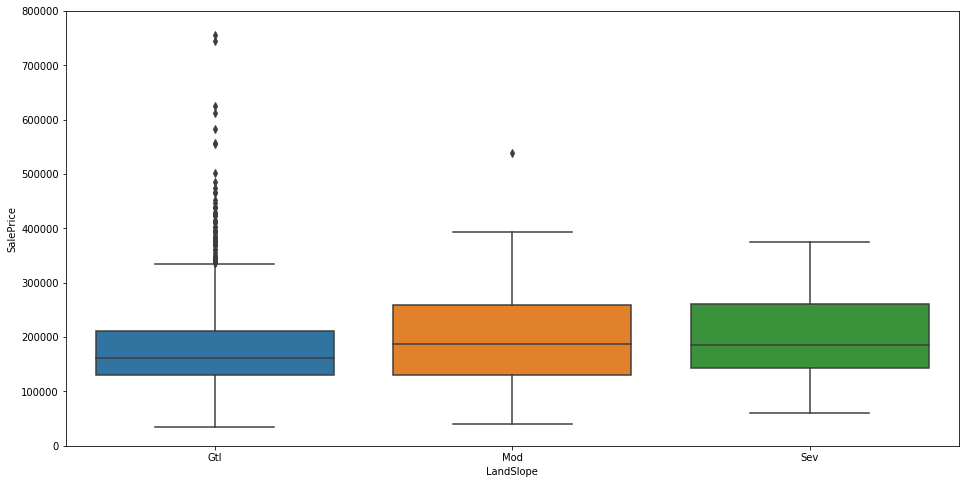

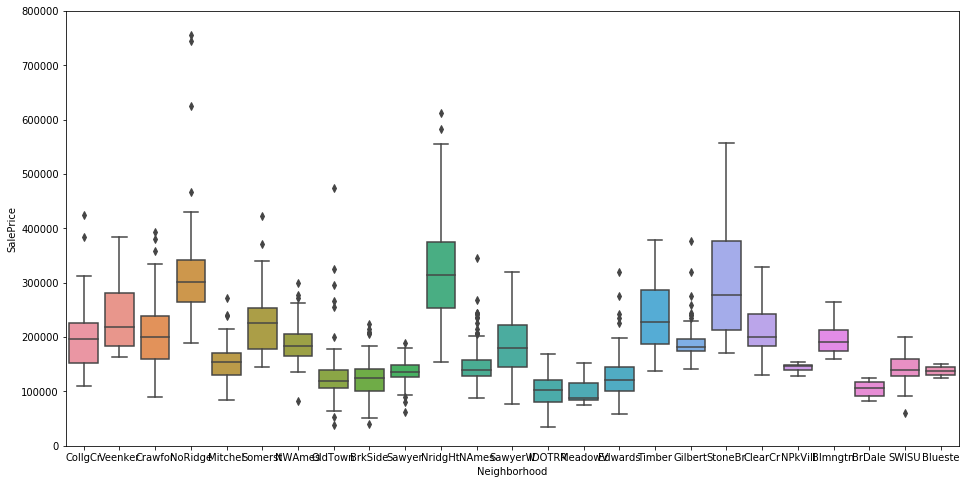

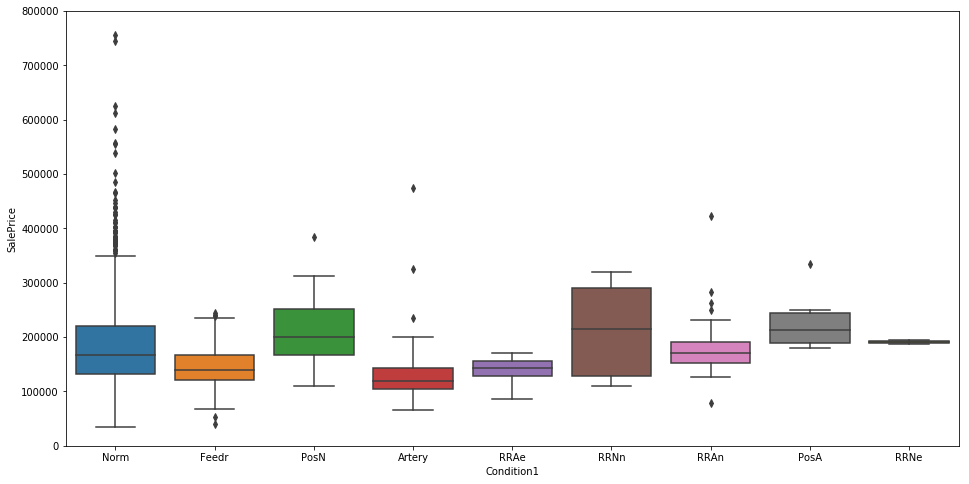

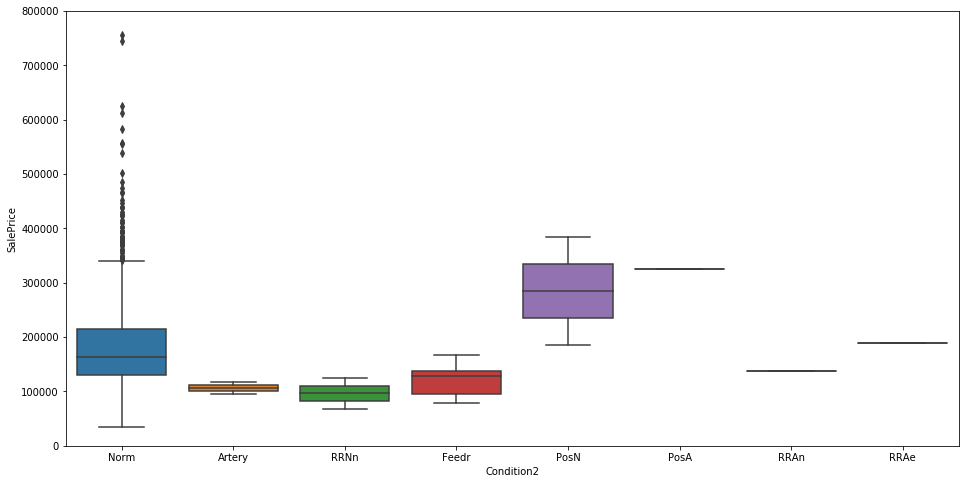

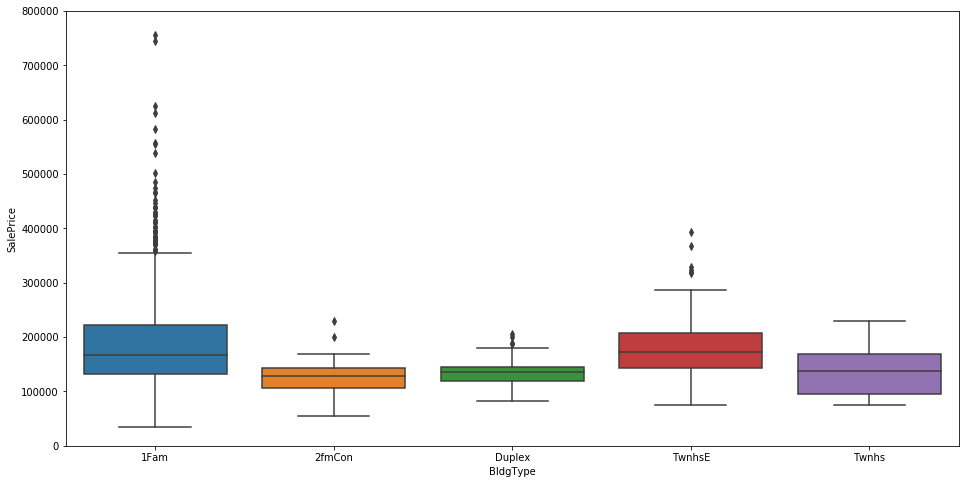

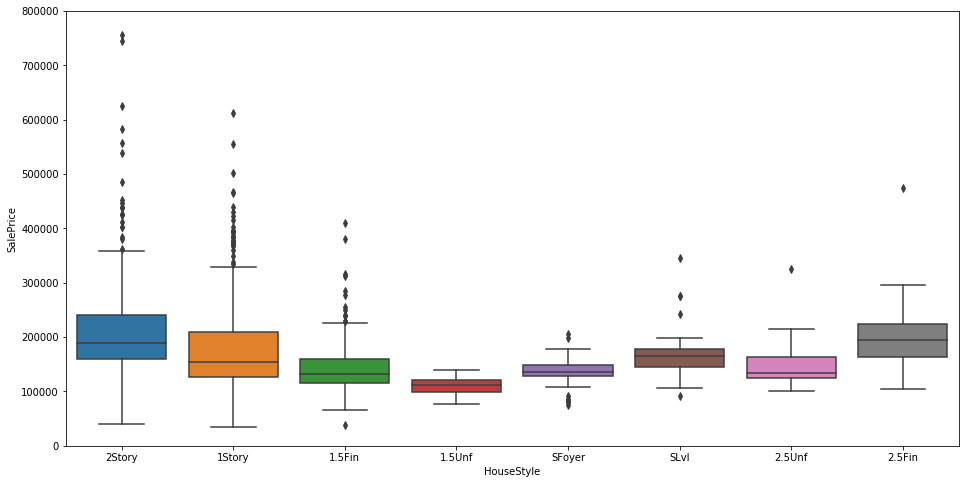

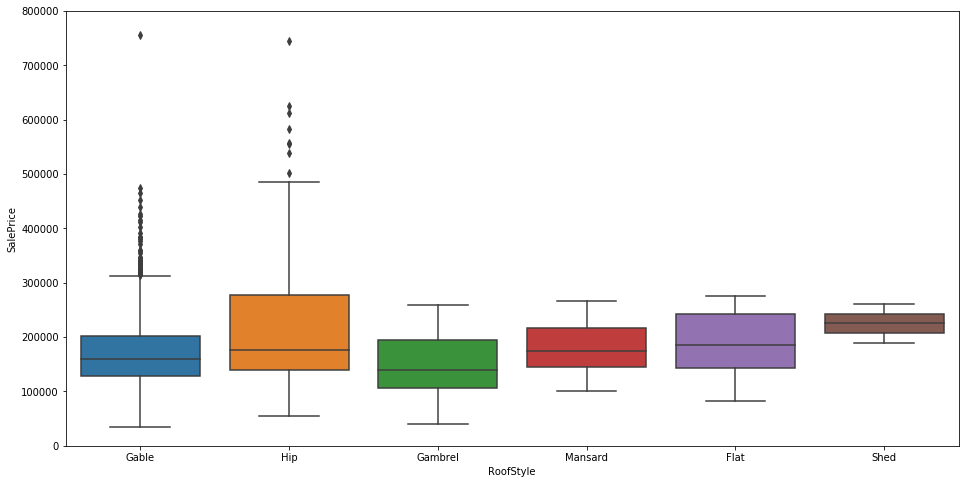

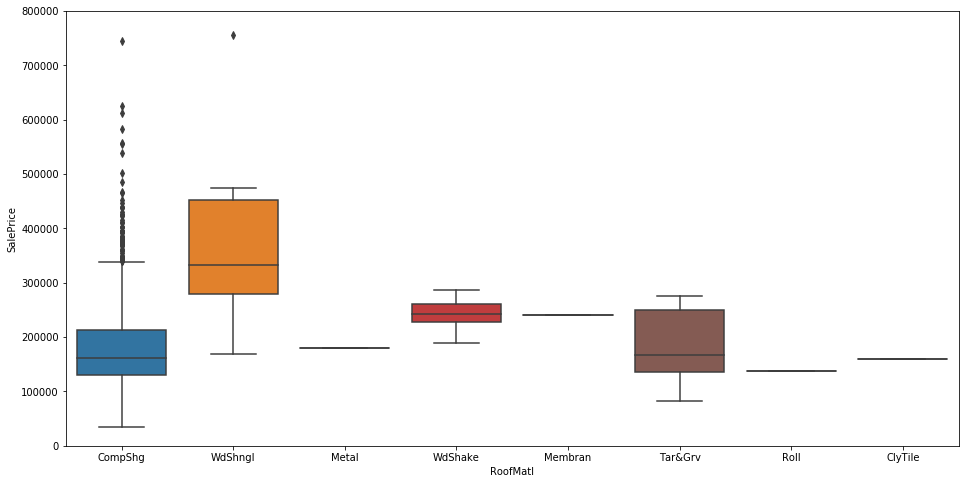

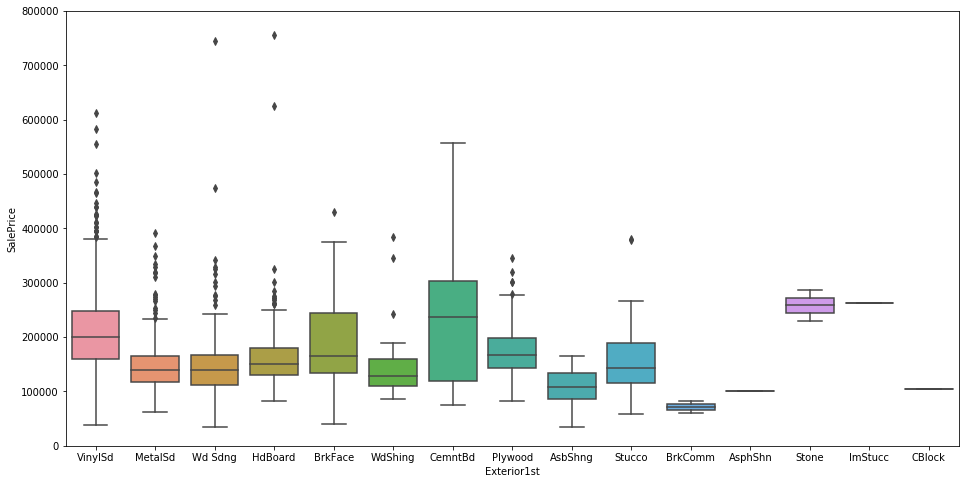

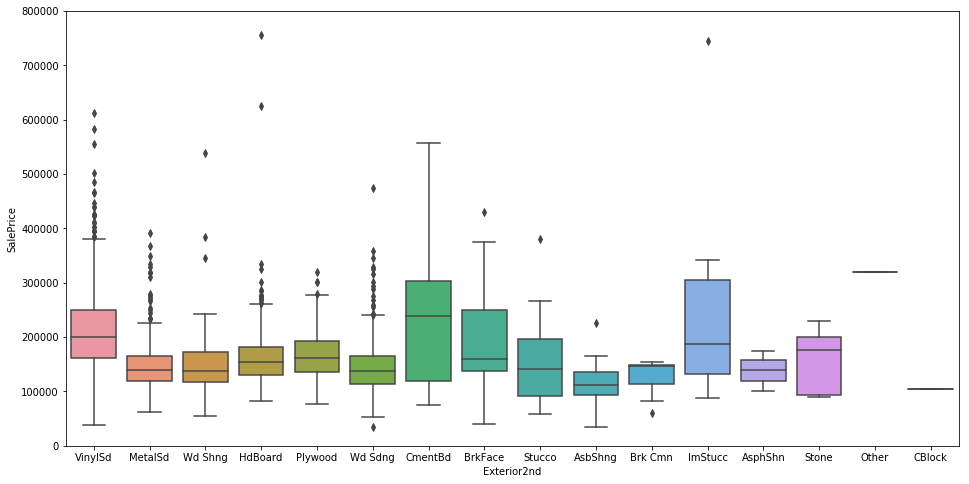

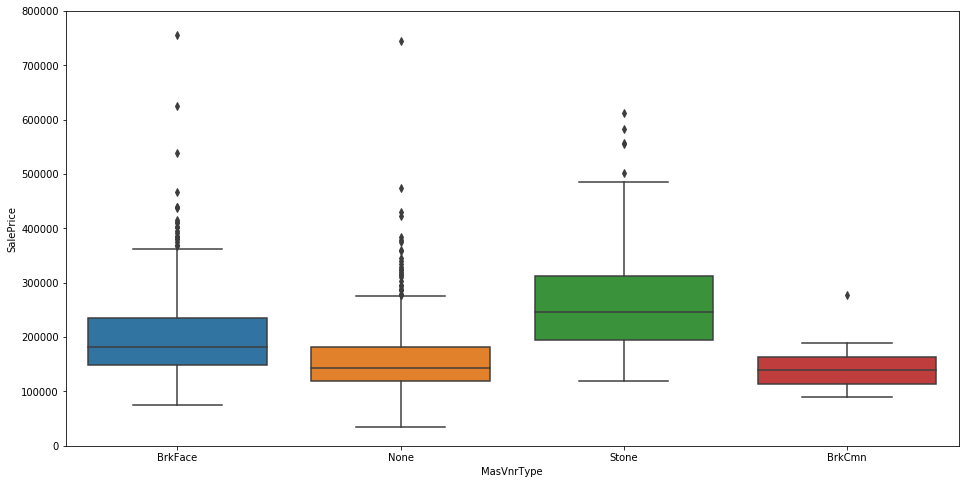

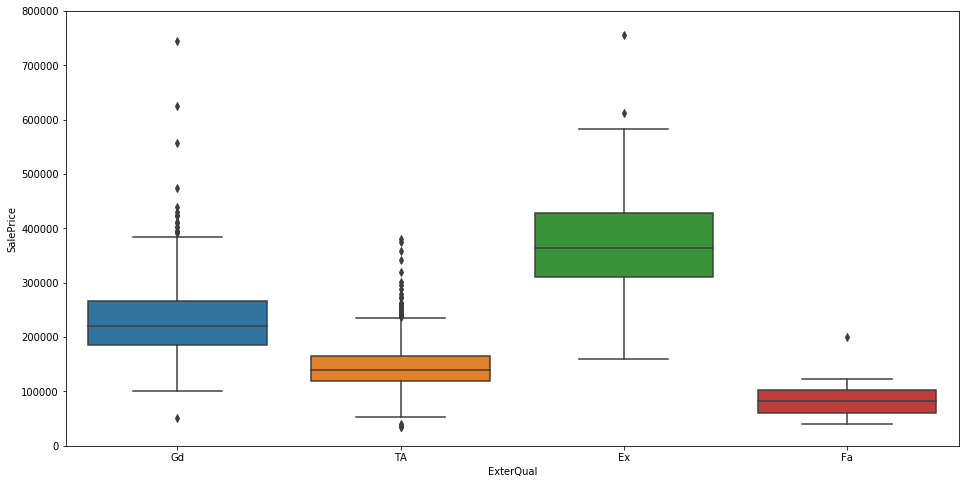

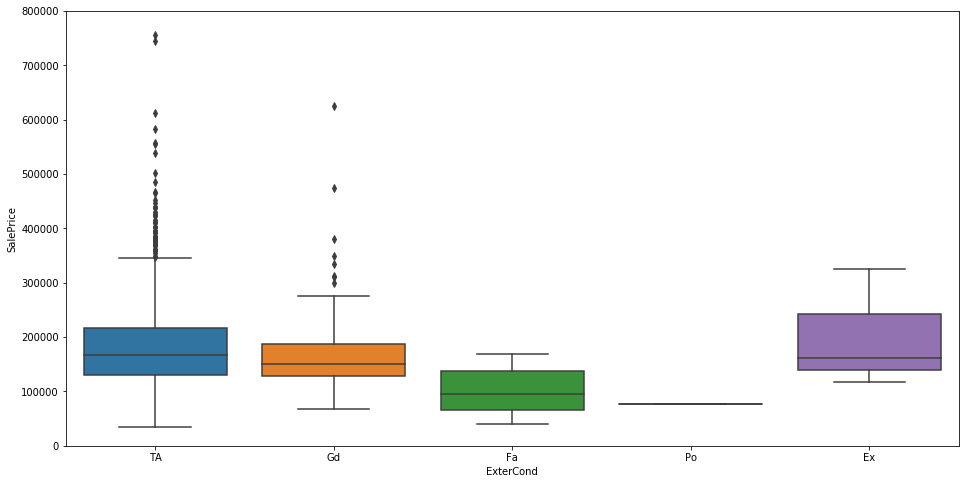

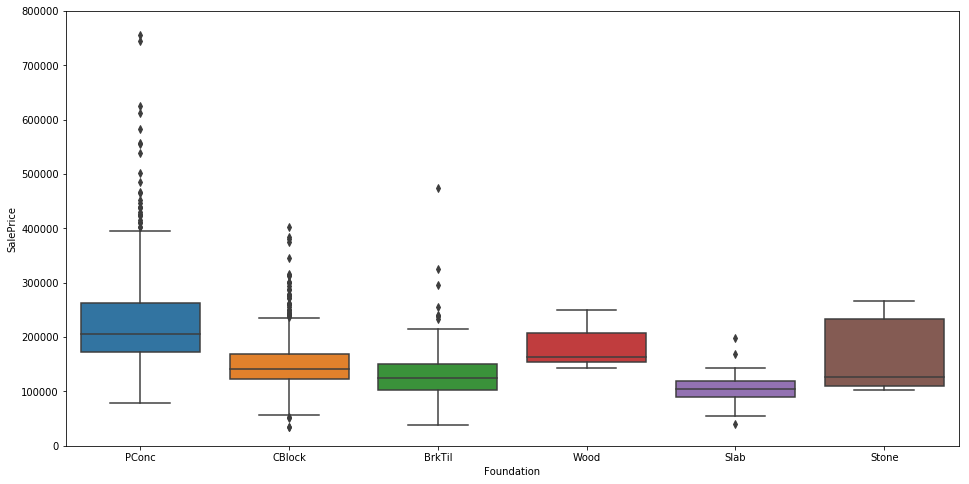

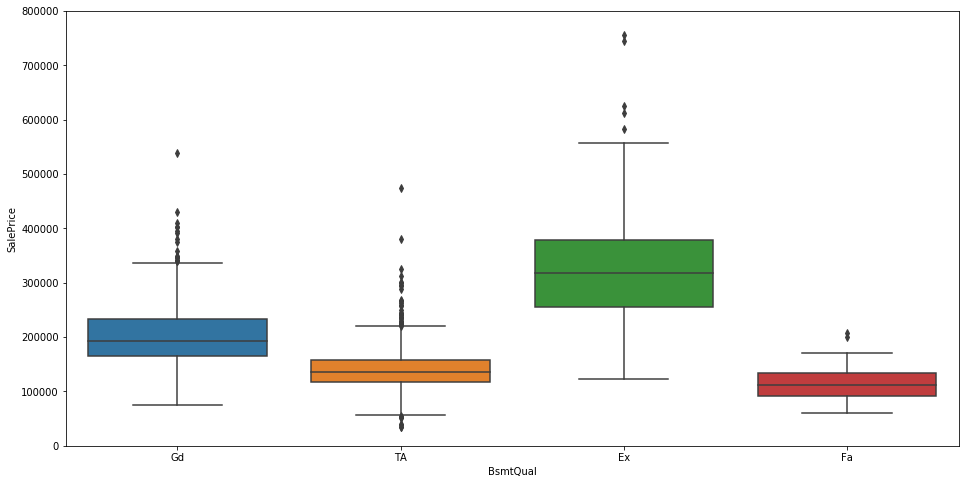

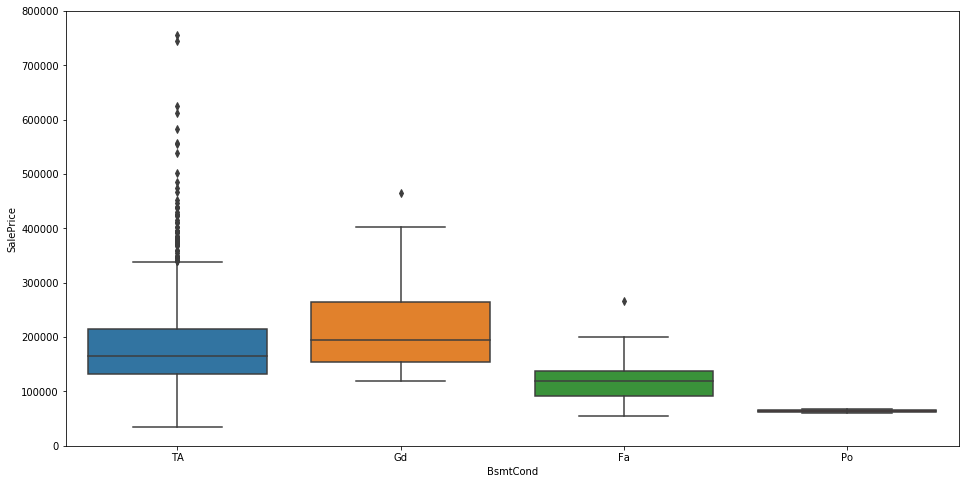

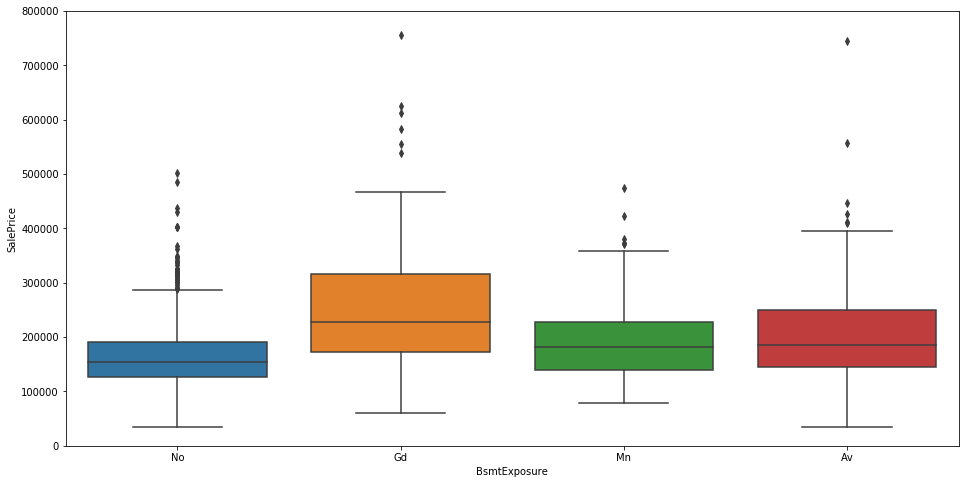

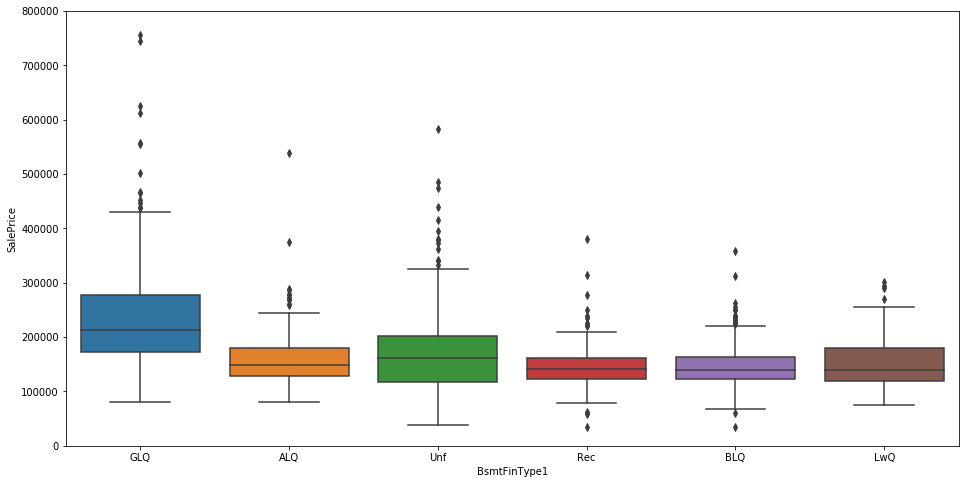

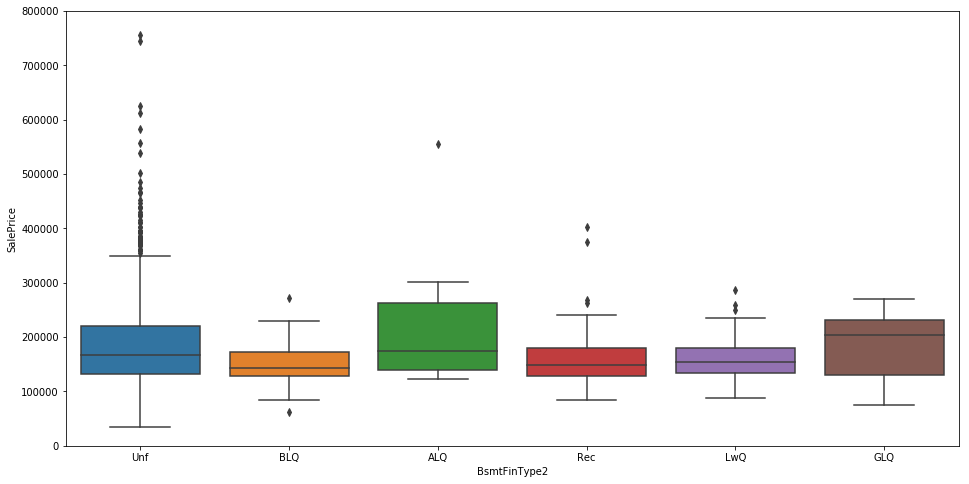

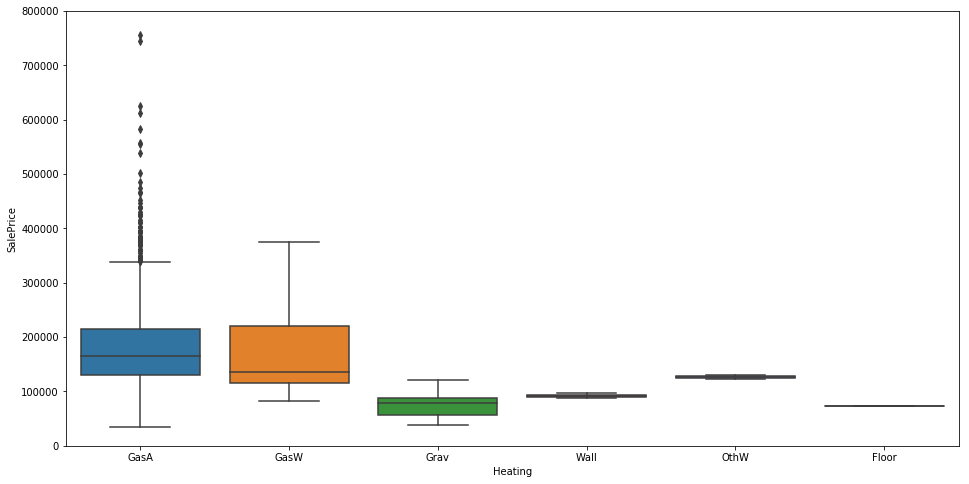

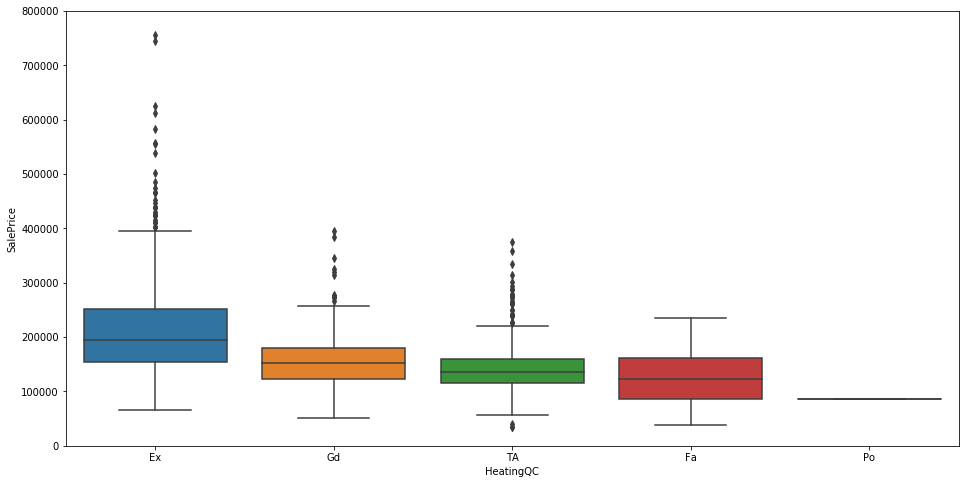

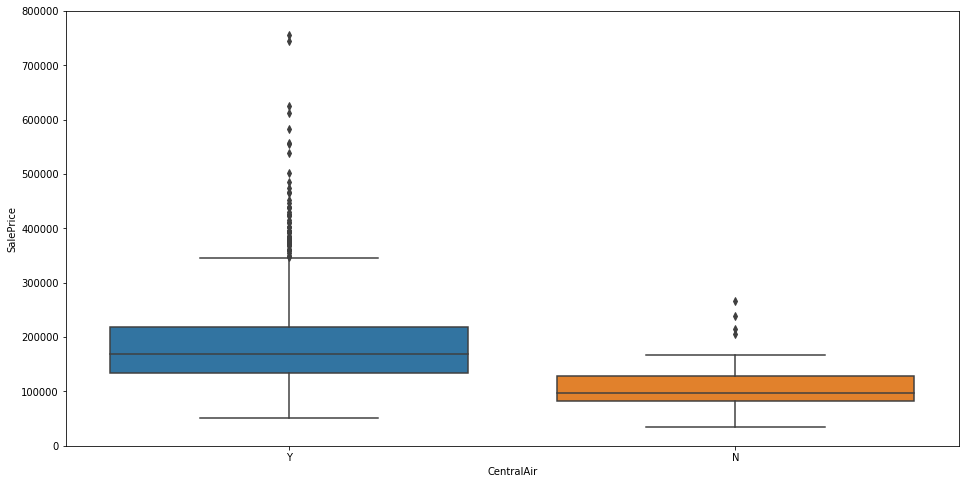

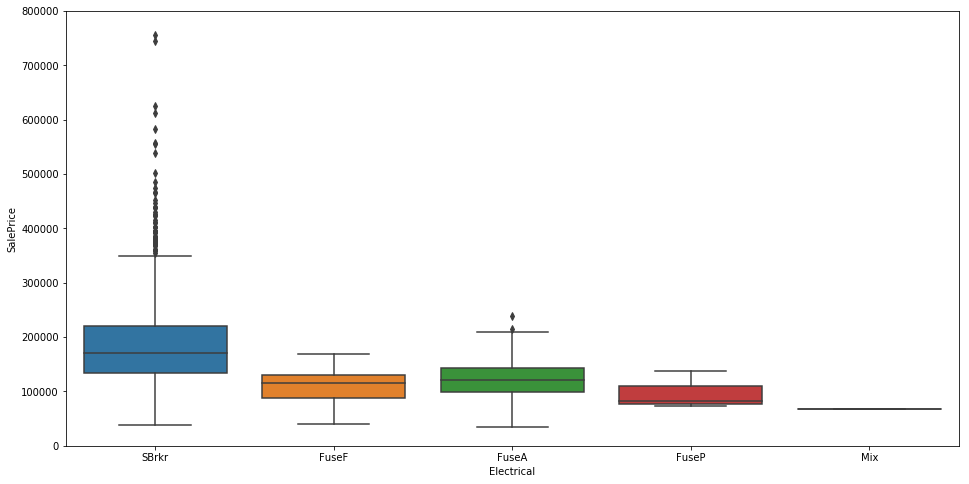

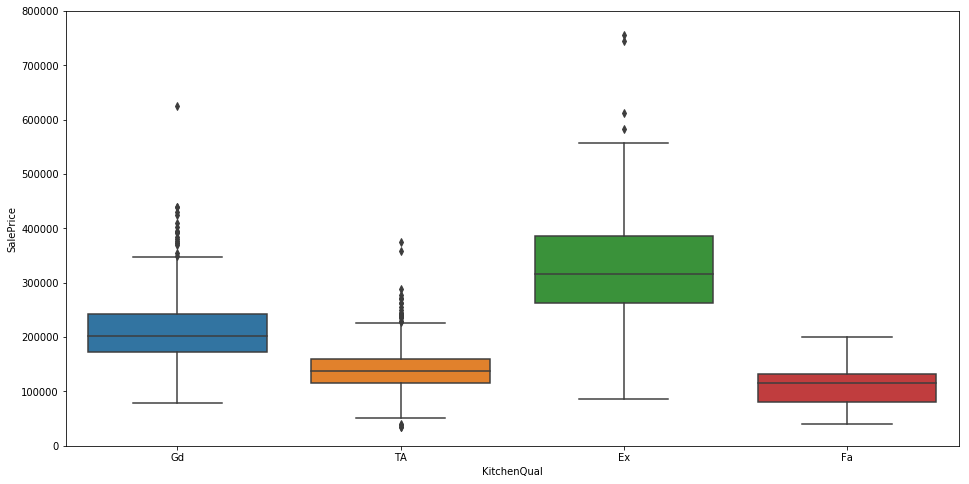

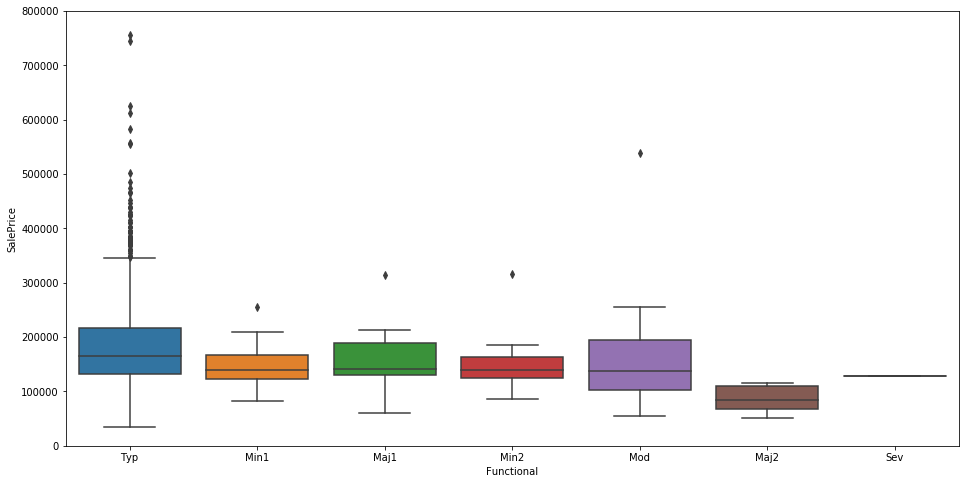

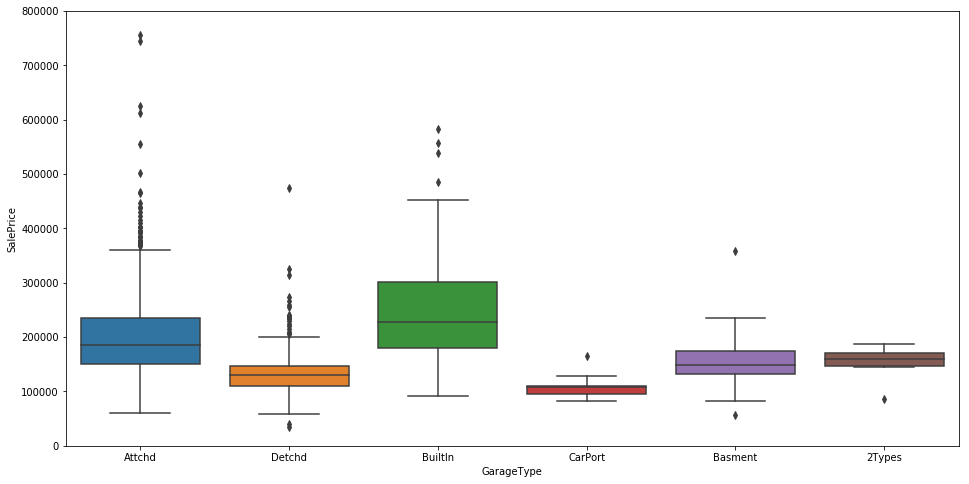

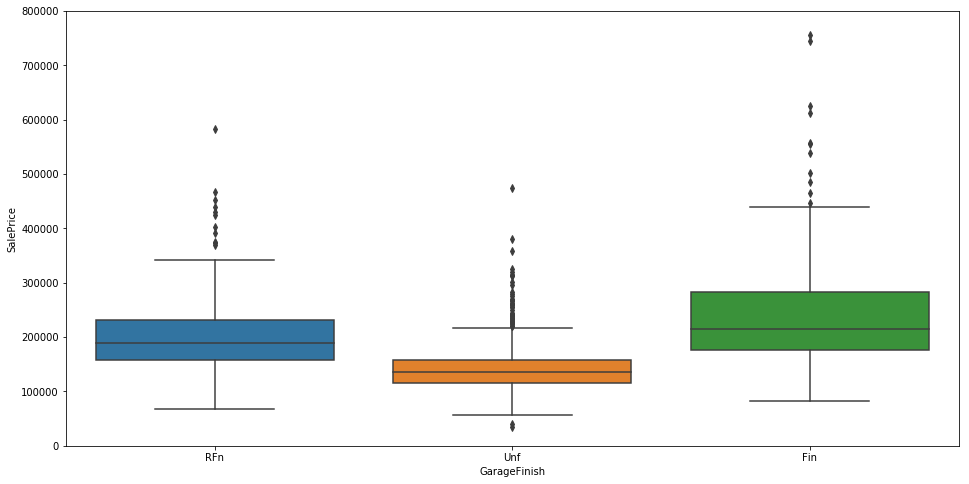

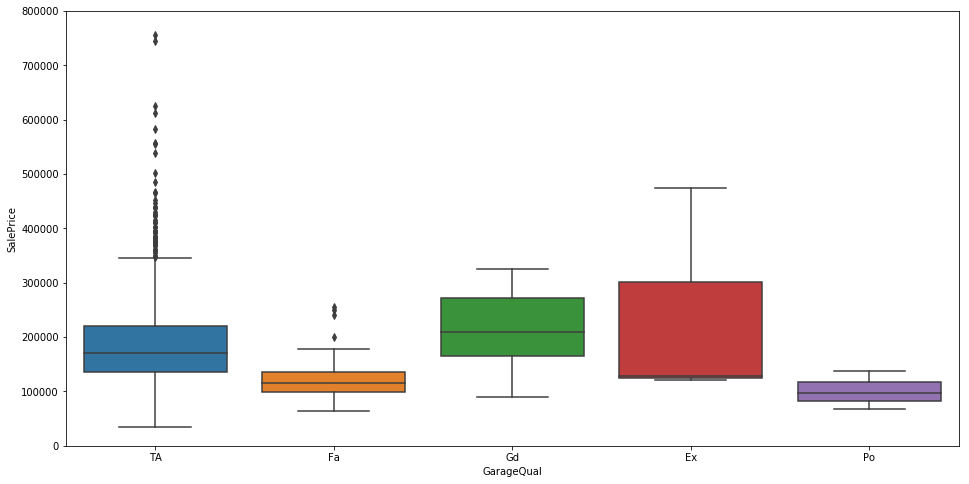

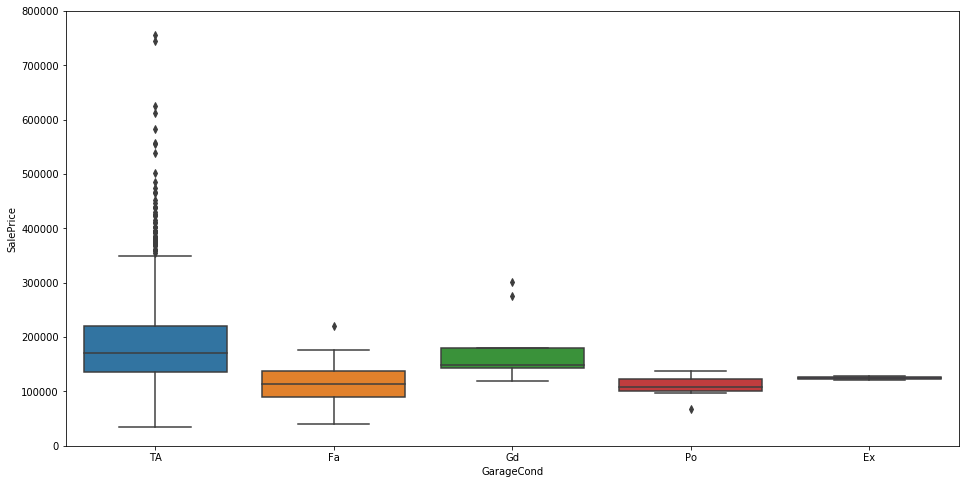

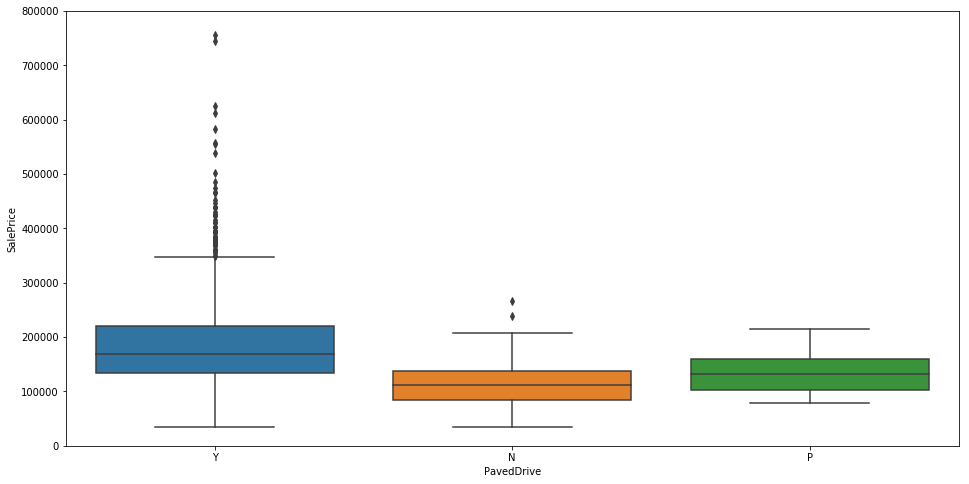

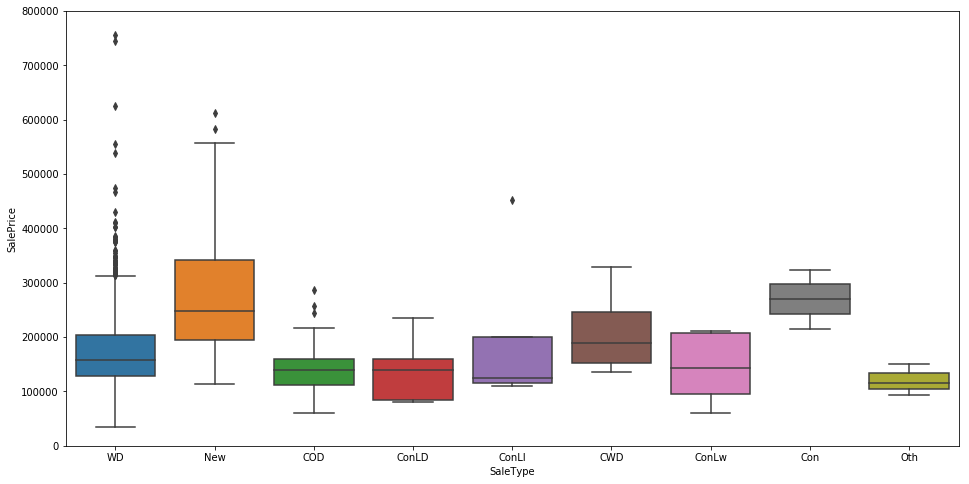

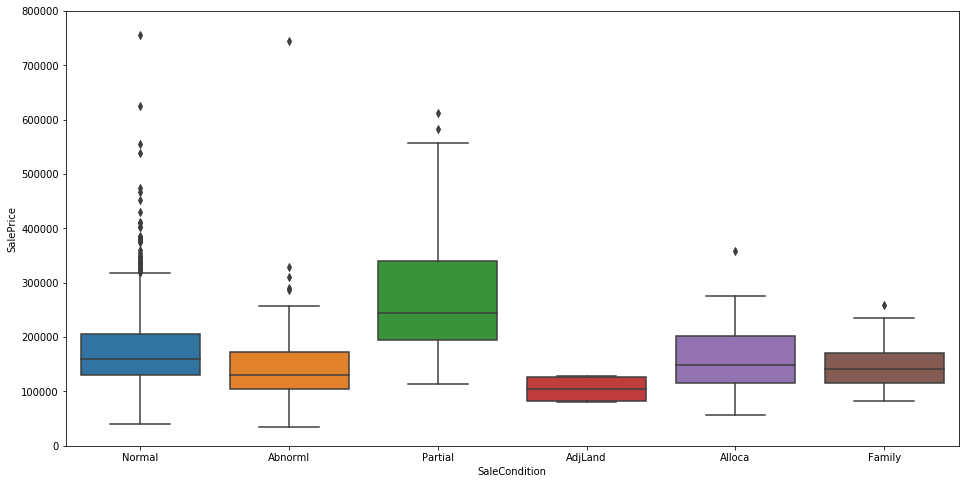

In [45]:
# plot relationship of sale price with all categorical data
for (colName, colData) in new_train_df.iteritems():
    if is_object_dtype(colData):
        data = pd.concat([new_train_df['SalePrice'], colData], axis=1)
        f, ax = plt.subplots(figsize=(16, 8))
        fig = sns.boxplot(x=colName, y="SalePrice", data=data)
        fig.axis(ymin=0, ymax=800000);

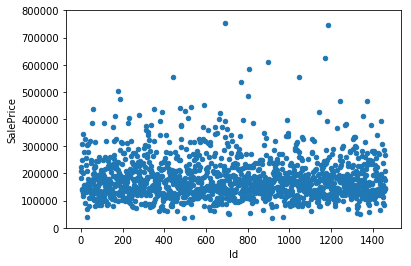

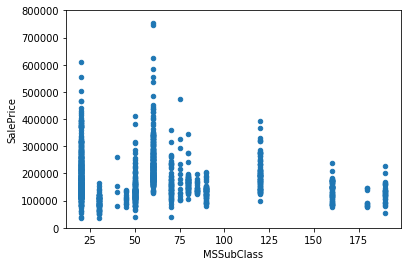

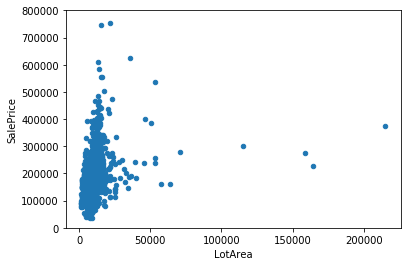

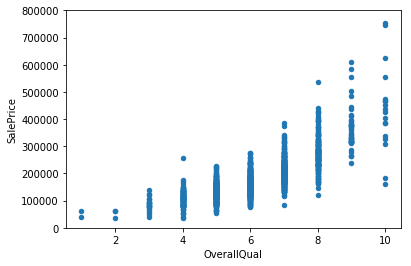

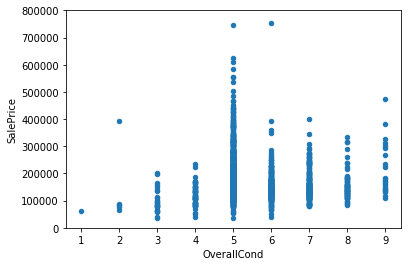

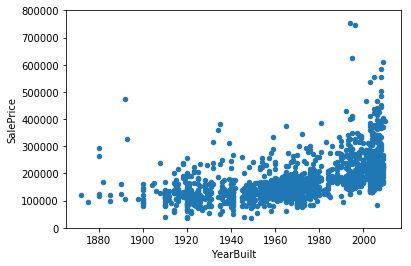

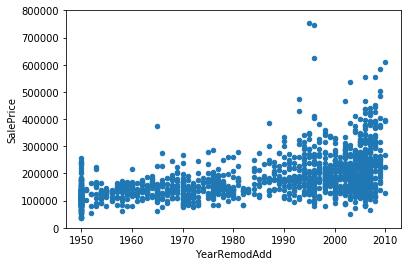

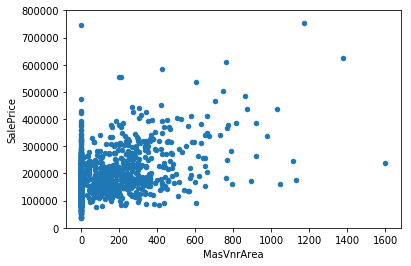

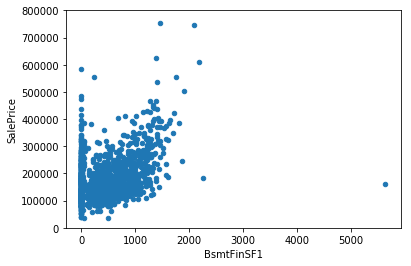

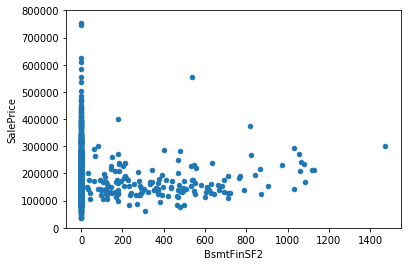

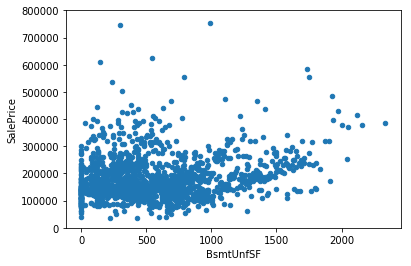

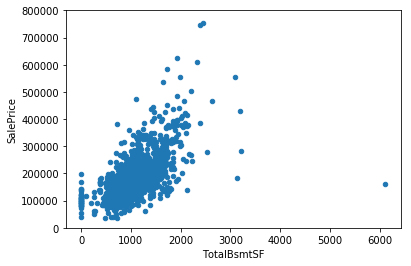

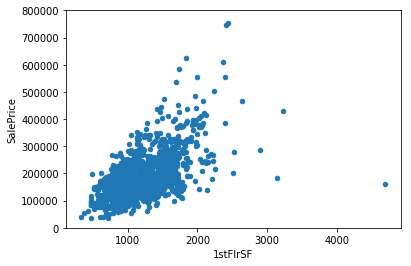

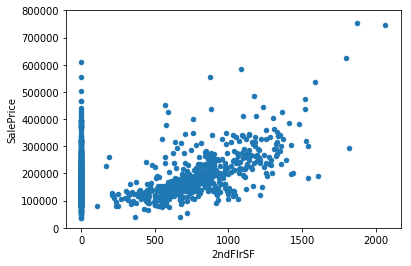

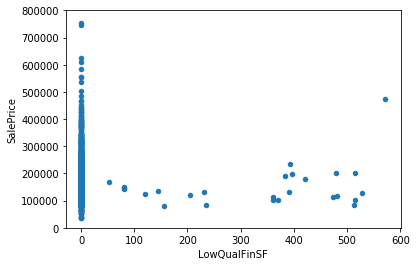

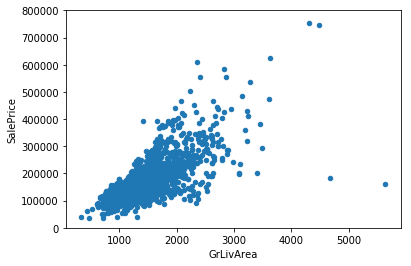

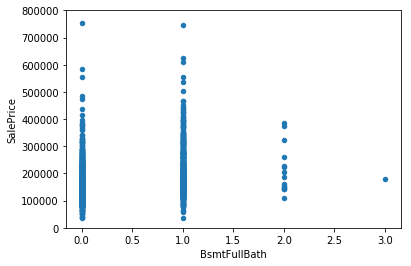

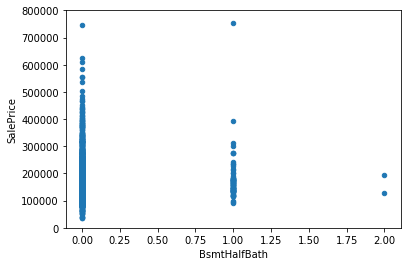

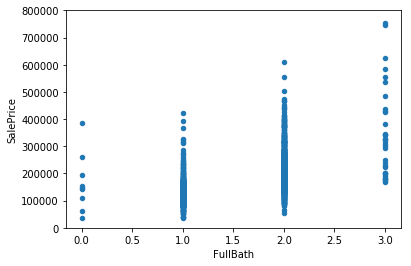

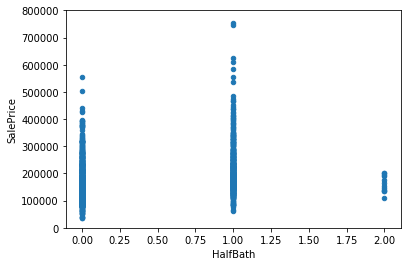

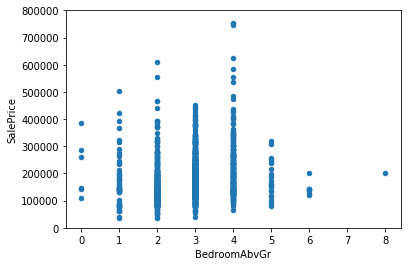

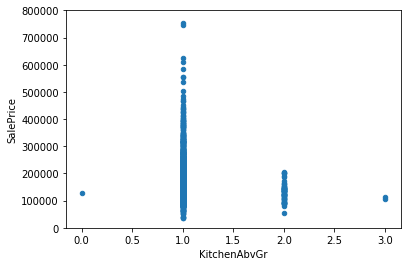

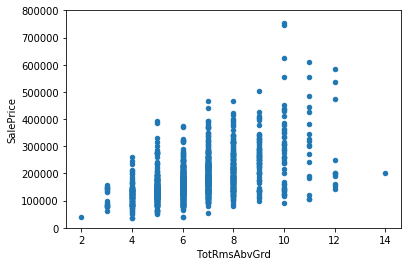

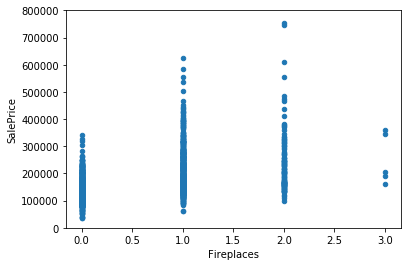

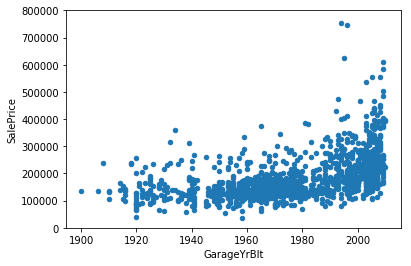

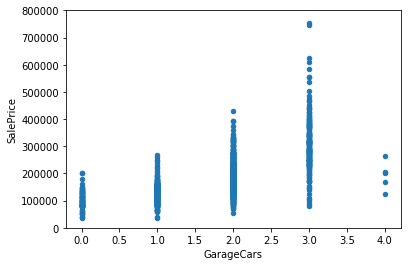

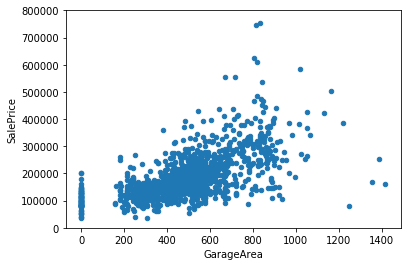

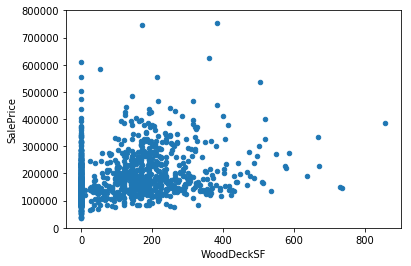

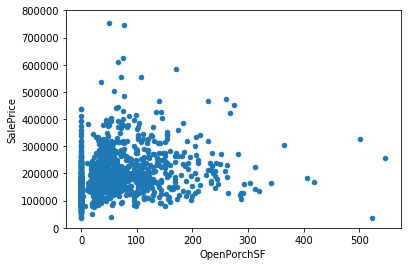

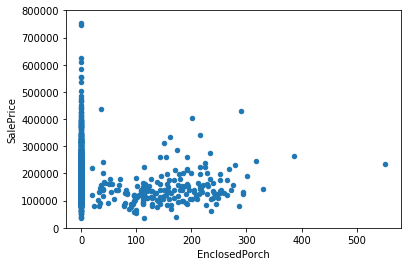

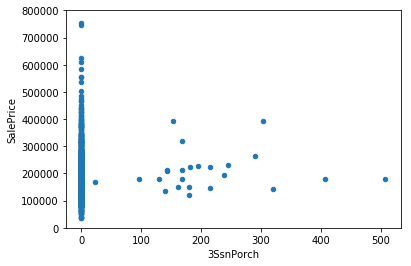

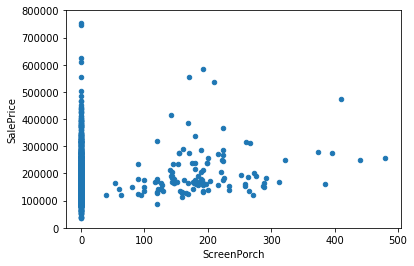

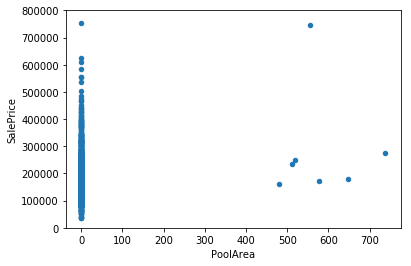

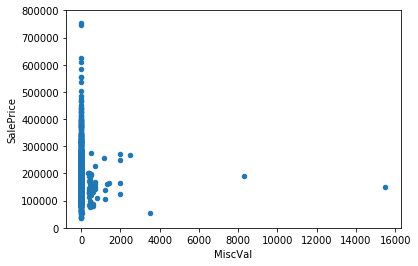

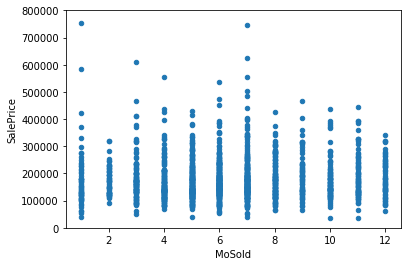

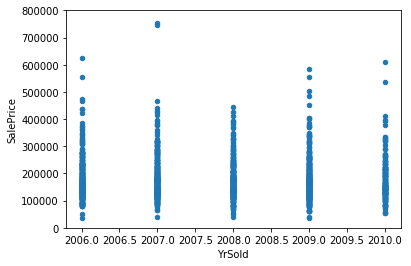

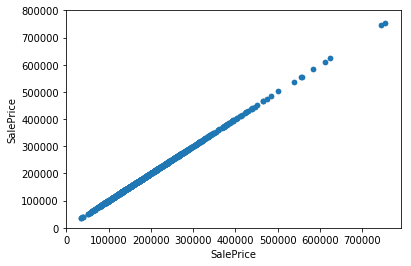

In [48]:
# plot relationship of sale price with all numerical data
from pandas.api.types import is_numeric_dtype
for (colName, colData) in new_train_df.iteritems():
    if is_numeric_dtype(colData):
        data = pd.concat([new_train_df['SalePrice'], colData], axis=1)
        data.plot.scatter(x=colName, y='SalePrice', ylim=(0,800000));

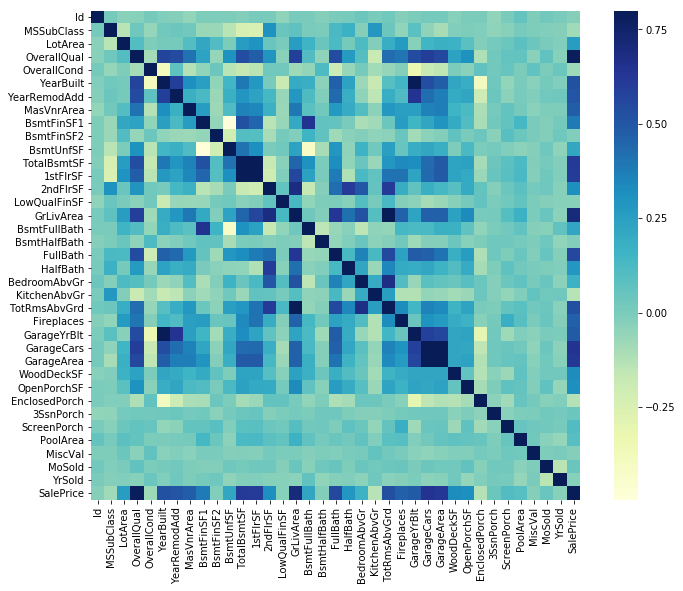

In [12]:
# correlation matrix
corrmat = new_train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="YlGnBu", vmax=.8, square=True);

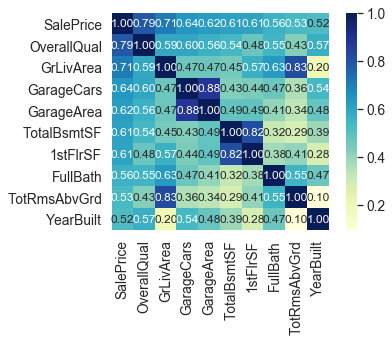

In [13]:
# saleprice correlation matrix with top 10 correlated features
import numpy as np
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(new_train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
# fill NA or missing values in data
from pandas.api.types import is_numeric_dtype
for (colName, colData) in new_train_df.iteritems():
    if is_numeric_dtype(colData):
        new_train_df[colName] = colData.fillna(colData.median())
    else:
        new_train_df[colName] = colData.fillna('Missing')
        
# verify no missing values left
(new_train_df.isnull().sum().sort_values(ascending=False)/new_train_df.shape[0])[:10]

/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


SalePrice       0.0
YearRemodAdd    0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
dtype: float64

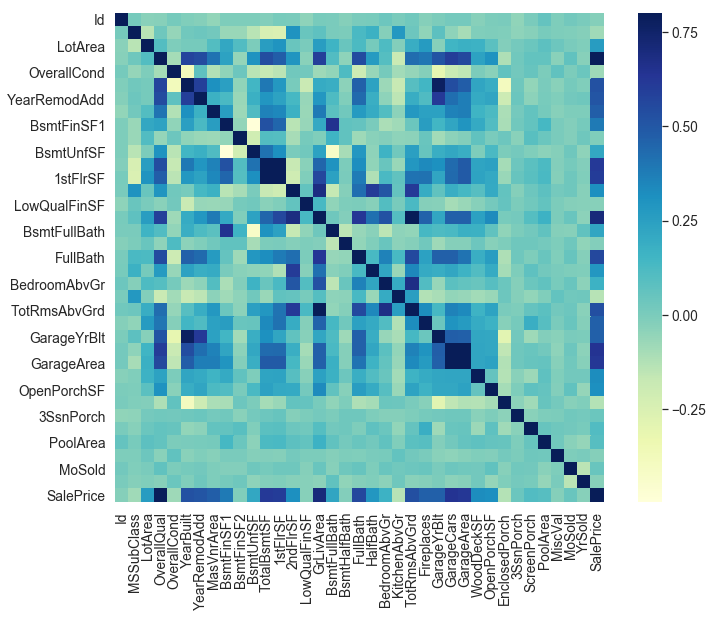

In [15]:
# correlation matrix
corrmat = new_train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="YlGnBu", vmax=.8, square=True);

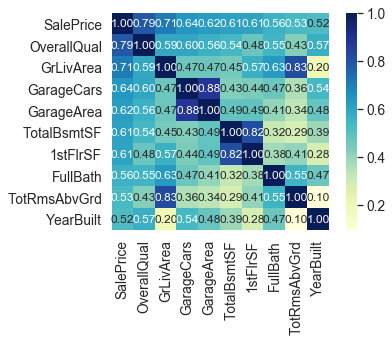

In [16]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(new_train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:
# create new feature to represent total square feet of house
new_train_df['TotalSF'] = new_train_df['TotalBsmtSF'] + new_train_df['GrLivArea']

# drop unneeded columns esp those that are redundant
# drop GarageArea bc colinear w GarageCars and has lower correlation; same w 1stFlrSF and TotalBsmtSF
# drop GrLivArea and TotalBsmtSF because TotalSF has a higher correlation (0.78) than both of them
new_train_df.drop(['GarageArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


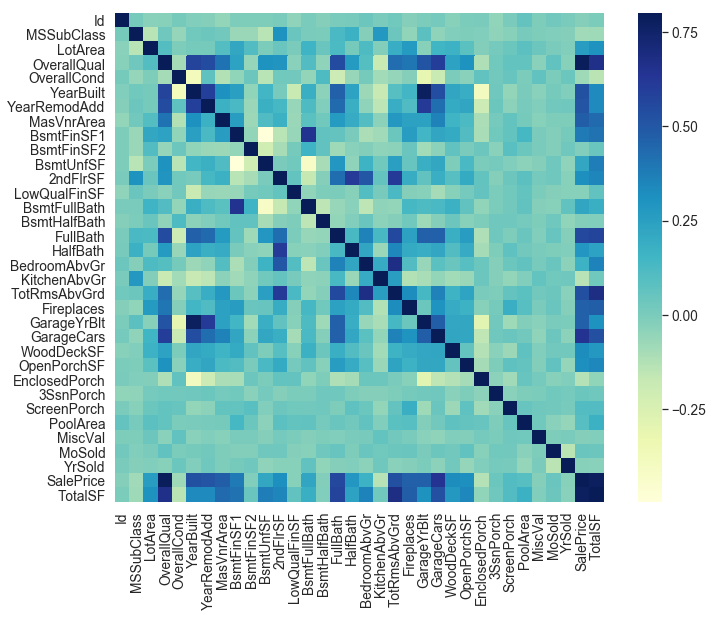

In [18]:
# correlation matrix
corrmat = new_train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="YlGnBu", vmax=.8, square=True);

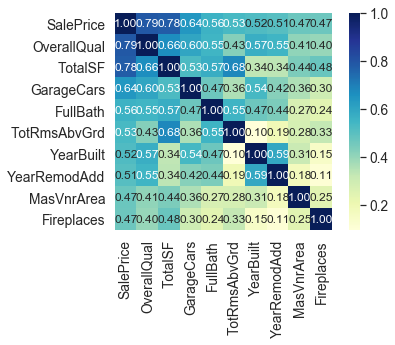

In [19]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(new_train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [20]:
# standardize only numerical features first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfs = []
final_train_df = new_train_df.copy()
for (colName, colData) in final_train_df.iteritems():
    if is_numeric_dtype(colData) and colName != 'Id':
        dfs.append(pd.DataFrame(scaler.fit_transform(final_train_df[[colName]]), columns=[colName]))
        final_train_df.drop([colName], axis=1, inplace=True)

dfs.insert(0, final_train_df)
final_train_df = pd.concat(dfs, axis=1, sort=True)
final_train_df.head()

/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/hamzah/Workspace/.virtualenvs

,Id,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
0,1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273,-0.008372
1,2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288,-0.059386
2,3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154,0.161672
3,4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281,-0.121330
4,5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843,0.935372


In [21]:
# one hot encode all the categorial vars
final_train_df = pd.get_dummies(final_train_df.drop(['Id'], axis=1))
final_train_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,0,0,0,1,0,0,0,0,1,0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,0,0,0,1,0,0,0,0,1,0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,0,0,0,1,0,0,0,0,1,0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,0,0,0,1,1,0,0,0,0,0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,0,0,0,1,0,0,0,0,1,0


In [22]:
# standardize the sale price data
# from sklearn.preprocessing import StandardScaler
# saleprice_scaled = StandardScaler().fit_transform(new_train_df['SalePrice'][:, np.newaxis])
# saleprice_scaled

In [23]:
# read testing data
test_df = pd.read_csv('./data/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [24]:
# preprocess the testing data
# drop cols with more than 10% missing data
# final_test_df = test_df.dropna(axis='columns', thresh=test_df.shape[0]*0.9)
final_test_df = test_df.drop(['PoolQC', 'Alley', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage'], axis='columns')

# fill NA or missing values in data
for (colName, colData) in final_test_df.iteritems():
    if is_numeric_dtype(colData):
        final_test_df[colName] = colData.fillna(colData.median())
    else:
        final_test_df[colName] = colData.fillna('Missing')
        
# create new feature to represent total square feet of house
final_test_df['TotalSF'] = final_test_df['TotalBsmtSF'] + final_test_df['GrLivArea']

# drop unneeded columns esp those that are redundant
final_test_df.drop(['GarageArea', '1stFlrSF', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# standardize only numerical features first
dfs = []
for (colName, colData) in final_test_df.iteritems():
    if is_numeric_dtype(colData) and colName != 'Id':
        dfs.append(pd.DataFrame(scaler.fit_transform(final_test_df[[colName]]), columns=[colName]))
        final_test_df.drop([colName], axis=1, inplace=True)

dfs.insert(0, final_test_df)
final_test_df = pd.concat(dfs, axis=1, sort=True)

# one hot encode all the categorial vars
final_test_df = pd.get_dummies(final_test_df.drop(['Id'], axis=1))
final_test_df.head()

/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/hamzah/Workspace/.virtualenvs

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Missing,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.874711,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,0.517537,-0.650461,...,0,0,0,1,0,0,0,0,1,0
1,-0.874711,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,-0.297689,-0.339225,...,0,0,0,1,0,0,0,0,1,0
2,0.061351,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,-0.297689,-0.954831,...,0,0,0,1,0,0,0,0,1,0
3,0.061351,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,-0.297689,-0.526882,...,0,0,0,1,0,0,0,0,1,0
4,1.465443,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,-0.297689,1.059048,...,0,0,0,1,0,0,0,0,1,0


In [25]:
# print cols present in train data and not present in test data
missing_test_cols = list(set(final_train_df.columns.values).difference(set(final_test_df.columns.values)))
missing_test_cols

['RoofMatl_Metal',
 'Electrical_Mix',
 'Exterior1st_Stone',
 'RoofMatl_ClyTile',
 'Exterior2nd_Other',
 'RoofMatl_Membran',
 'Condition2_RRNn',
 'Heating_OthW',
 'Electrical_Missing',
 'GarageQual_Ex',
 'SalePrice',
 'Heating_Floor',
 'RoofMatl_Roll',
 'HouseStyle_2.5Fin',
 'Condition2_RRAn',
 'Utilities_NoSeWa',
 'Condition2_RRAe',
 'Exterior1st_ImStucc']

In [26]:
# print cols present in test data and not present in train data
missing_train_cols = list(set(final_test_df.columns.values).difference(set(final_train_df.columns.values)))
missing_train_cols

['Exterior2nd_Missing',
 'KitchenQual_Missing',
 'SaleType_Missing',
 'Utilities_Missing',
 'MSZoning_Missing',
 'Functional_Missing',
 'Exterior1st_Missing']

In [27]:
# add cols present in train and not in test
for col in missing_test_cols:
    final_test_df[col] = '0'
    
# drop cols present in test and not in train
final_test_df.drop(missing_train_cols, axis=1, inplace=True)
final_test_df.drop(['SalePrice'], axis=1, inplace=True)

# verify shape is same except for SalePrice col
print(final_train_df.shape)
print(final_test_df.shape)

(1460, 278)
(1459, 277)


In [28]:
# run regression models
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression()
lin_regr.fit(final_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']])
predictions = lin_regr.predict(final_test_df)

# The coefficients
# print('Coefficients: \n', lin_regr.coef_)

# print first ten predictions
predictions[0:10]

array([[ 1.91771796e+11],
       [-1.84797007e+10],
       [ 3.68070967e+11],
       [ 1.96631255e+11],
       [-2.15285196e+11],
       [ 3.87633184e+11],
       [-1.58520971e+11],
       [ 3.68070967e+11],
       [ 7.06229476e+10],
       [ 1.74315278e+11]])

In [29]:
# perform 6-fold cross validation on linear regression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(lin_regr, final_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']], cv=6)
scores

array([-1.69233344e+19, -4.01832389e+18, -3.95764984e+17, -5.20602565e+17,
       -9.29494880e+18, -6.30133316e+19])

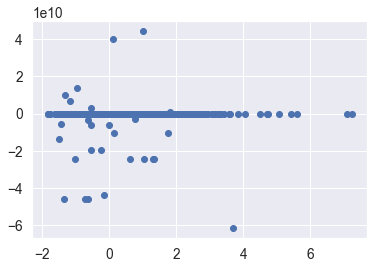

In [30]:
# Make cross validated predictions
predictions = cross_val_predict(lin_regr, final_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']], cv=6)
plt.scatter(final_train_df[['SalePrice']], predictions)

In [31]:
# get accuracy of model from cross validation on linear regression
metrics.r2_score(final_train_df[['SalePrice']], predictions)

-1.384097428267252e+19

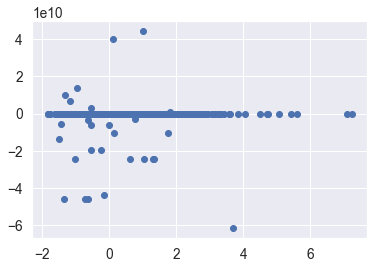

In [32]:
# try PCA and then linear regression
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_X = pca.fit_transform(final_train_df.drop(['SalePrice'], axis=1))
lin_regr.fit(pca_X, final_train_df[['SalePrice']])
predictions = cross_val_predict(lin_regr, final_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']], cv=6)
plt.scatter(final_train_df[['SalePrice']], predictions)

In [33]:
# get accuracy of model from cross validation on linear regression PCA
metrics.r2_score(final_train_df[['SalePrice']], predictions)

-1.384097428267252e+19

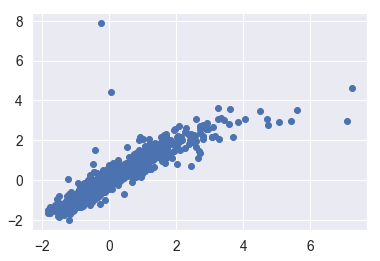

In [61]:
# ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5)
ridge.fit(final_train_df.drop(['SalePrice'], axis=1),  final_train_df[['SalePrice']])
predictions = cross_val_predict(ridge, final_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']], cv=6)
plt.scatter(final_train_df[['SalePrice']], predictions)

In [62]:
# get accuracy of model from cross validation on ridge regression
metrics.r2_score(final_train_df[['SalePrice']], predictions)

0.8248191055065455

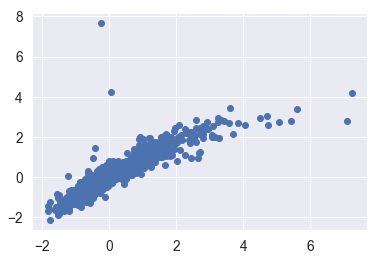

In [65]:
# lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.005)
lasso.fit(final_train_df.drop(['SalePrice'], axis=1),  final_train_df[['SalePrice']])
predictions = cross_val_predict(lasso, final_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']], cv=6)
plt.scatter(final_train_df[['SalePrice']], predictions)

In [66]:
# get accuracy of model from cross validation on Lasso
metrics.r2_score(final_train_df[['SalePrice']], predictions)

0.8211464058711248

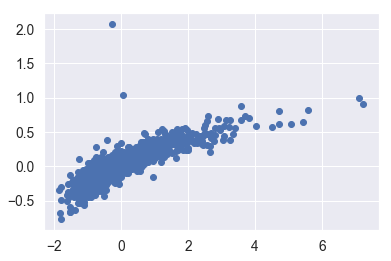

In [38]:
# elastic net regression
from sklearn.linear_model import ElasticNet
elas = ElasticNet(random_state=0)
elas.fit(final_train_df.drop(['SalePrice'], axis=1),  final_train_df[['SalePrice']])
predictions = cross_val_predict(elas, final_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']], cv=6)
plt.scatter(final_train_df[['SalePrice']], predictions)

In [39]:
# get accuracy of model from cross validation on Elastic Net
metrics.r2_score(final_train_df[['SalePrice']], predictions)

0.3517754493736398

/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-pac

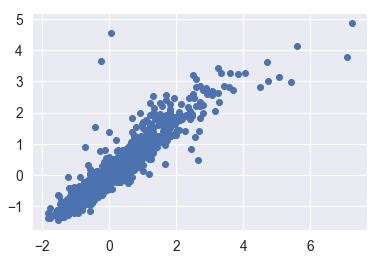

In [67]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
rnd_for = RandomForestRegressor(random_state=0, n_estimators=100)
rnd_for.fit(final_train_df.drop(['SalePrice'], axis=1),  final_train_df[['SalePrice']])
predictions = cross_val_predict(rnd_for, final_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']], cv=6)
plt.scatter(final_train_df[['SalePrice']], predictions)

In [68]:
# get accuracy of model from cross validation on random forest regression
metrics.r2_score(final_train_df[['SalePrice']], predictions)

0.8657658971762697

/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/

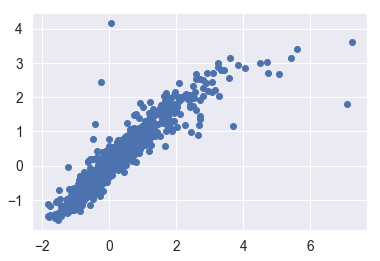

In [42]:
# SVM regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(final_train_df.drop(['SalePrice'], axis=1),  final_train_df[['SalePrice']])
predictions = cross_val_predict(svr, final_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']], cv=6)
plt.scatter(final_train_df[['SalePrice']], predictions)

In [43]:
# get accuracy of model from cross validation on SVR
metrics.r2_score(final_train_df[['SalePrice']], predictions)

0.8681467749985348

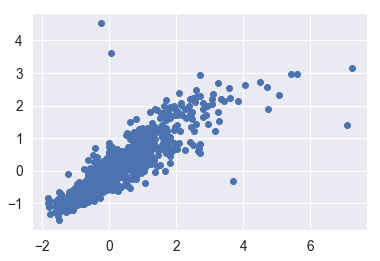

In [44]:
# KNearestNeighbors regressor
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(final_train_df.drop(['SalePrice'], axis=1),  final_train_df[['SalePrice']])
predictions = cross_val_predict(neigh, final_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']], cv=6)
plt.scatter(final_train_df[['SalePrice']], predictions)

In [45]:
# get accuracy of model from cross validation on KNearestNeighbors regression
metrics.r2_score(final_train_df[['SalePrice']], predictions)

0.757920656790332

/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hamzah/Workspace/.virtualenvs/comp562/lib/pyt

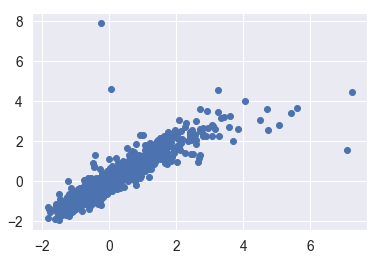

In [59]:
# Multi-layer perceptron regressor
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(100,))
nn.fit(final_train_df.drop(['SalePrice'], axis=1),  final_train_df[['SalePrice']])
predictions = cross_val_predict(nn, final_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']], cv=6)
plt.scatter(final_train_df[['SalePrice']], predictions)

In [60]:
# get accuracy of model from cross validation on MLP regression
metrics.r2_score(final_train_df[['SalePrice']], predictions)

0.8004921076891152

In [48]:
# lin reg, ridge, and lasso give the best results
# try using only top 10 correlated features w sale price to improve results
sel_train_df = final_train_df[['OverallQual', 'TotalSF', 'GarageCars', 'FullBath', 'TotRmsAbvGrd',
                               'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'SalePrice']]
sel_train_df.head()

,OverallQual,TotalSF,GarageCars,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,SalePrice
0,0.651479,-0.008372,0.311725,0.789741,0.912210,1.050994,0.878668,0.514104,-0.951226,0.347273
1,-0.071836,-0.059386,0.311725,0.789741,-0.318683,0.156734,-0.429577,-0.570750,0.600495,0.007288
2,0.651479,0.161672,0.311725,0.789741,-0.318683,0.984752,0.830215,0.325915,0.600495,0.536154
3,0.651479,-0.121330,1.650307,-1.026041,0.296763,-1.863632,-0.720298,-0.570750,0.600495,-0.515281
4,1.374795,0.935372,1.650307,0.789741,1.527656,0.951632,0.733308,1.366489,0.600495,0.869843


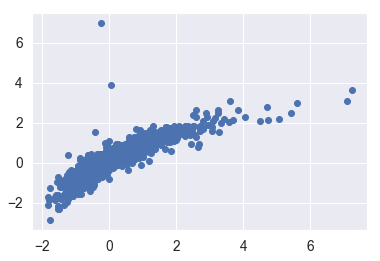

In [49]:
# perform 6-fold cross validation on linear regression
lin_regr = LinearRegression()
lin_regr.fit(sel_train_df.drop(['SalePrice'], axis=1), sel_train_df[['SalePrice']])
predictions = cross_val_predict(lin_regr, sel_train_df.drop(['SalePrice'], axis=1), sel_train_df[['SalePrice']], cv=6)
plt.scatter(sel_train_df[['SalePrice']], predictions)

In [50]:
# get accuracy of model from cross validation on linear regression
metrics.r2_score(sel_train_df[['SalePrice']], predictions)

0.7625323303616419

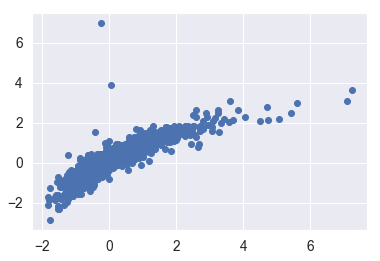

In [51]:
# ridge regression
ridge = Ridge(alpha=0.005)
ridge.fit(sel_train_df.drop(['SalePrice'], axis=1),  sel_train_df[['SalePrice']])
predictions = cross_val_predict(ridge, sel_train_df.drop(['SalePrice'], axis=1), sel_train_df[['SalePrice']], cv=6)
plt.scatter(sel_train_df[['SalePrice']], predictions)

In [52]:
# get accuracy of model from cross validation on ridge regression
metrics.r2_score(sel_train_df[['SalePrice']], predictions)

0.7625326674839624

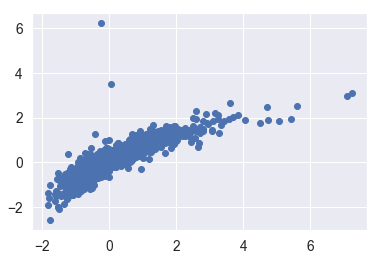

In [53]:
# lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(sel_train_df.drop(['SalePrice'], axis=1),  sel_train_df[['SalePrice']])
predictions = cross_val_predict(lasso, sel_train_df.drop(['SalePrice'], axis=1), sel_train_df[['SalePrice']], cv=6)
plt.scatter(sel_train_df[['SalePrice']], predictions)

In [54]:
# get accuracy of model from cross validation on Lasso
metrics.r2_score(sel_train_df[['SalePrice']], predictions)

0.7412280645356143

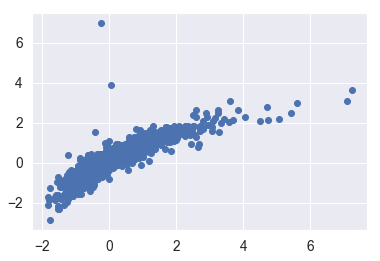

In [55]:
# try PCA and then linear regression
pca = PCA(n_components=3)
pca_X = pca.fit_transform(sel_train_df.drop(['SalePrice'], axis=1))
lin_regr.fit(pca_X, sel_train_df[['SalePrice']])
predictions = cross_val_predict(lin_regr, sel_train_df.drop(['SalePrice'], axis=1), final_train_df[['SalePrice']], cv=6)
plt.scatter(sel_train_df[['SalePrice']], predictions)

In [56]:
# get accuracy of model from cross validation on pca lin reg
metrics.r2_score(sel_train_df[['SalePrice']], predictions)

0.7625323303616419